In [2]:
import os
import logging
import pandas as pd

from stellr import Stars

In [3]:
data = pd.read_csv(f'../../data/tracks/test_stars/test_stars_obs.csv')
data.head()

,index,teff,lum,mhs,logg,dnu,teff_err,lum_err,mhs_err,logg_err,dnu_err
0,0,5509.868287,0.455461,0.048007,4.548031,168.551764,114.277805,0.015823,0.072604,0.019638,0.933
1,1,5132.860162,0.447037,0.120842,4.475545,162.050913,113.587711,0.016370,0.072604,0.019638,0.933
2,2,4950.043140,0.316783,0.354314,4.560913,177.591451,107.523969,0.011491,0.072604,0.019638,0.933
3,3,5541.041366,0.559689,0.060892,4.572558,163.088949,119.257352,0.019744,0.072604,0.019638,0.933
4,4,5332.712767,0.574903,-0.022662,4.467451,154.153583,116.408089,0.019259,0.072604,0.019638,0.933


In [4]:
data['name'] = data['index'].astype(str)
data.head()

,index,teff,lum,mhs,logg,dnu,teff_err,lum_err,mhs_err,logg_err,dnu_err,name
0,0,5509.868287,0.455461,0.048007,4.548031,168.551764,114.277805,0.015823,0.072604,0.019638,0.933,0
1,1,5132.860162,0.447037,0.120842,4.475545,162.050913,113.587711,0.016370,0.072604,0.019638,0.933,1
2,2,4950.043140,0.316783,0.354314,4.560913,177.591451,107.523969,0.011491,0.072604,0.019638,0.933,2
3,3,5541.041366,0.559689,0.060892,4.572558,163.088949,119.257352,0.019744,0.072604,0.019638,0.933,3
4,4,5332.712767,0.574903,-0.022662,4.467451,154.153583,116.408089,0.019259,0.072604,0.019638,0.933,4


In [5]:
observed = {
    'stars': data
}

In [6]:
stars = Stars(name='test', path='stars_results', observed=observed)

logging.basicConfig(
    format='%(asctime)s: %(levelname)s: %(message)s', 
    filename=os.path.join(stars.savedir, 'stars.log'), 
    level=logging.INFO,
)

In [7]:
sample_kwargs = {
    'num_samples': 2000,
    'burn_in': 2000,
    'num_chains': 10,
    'xla': True,
    'adaptation_kwargs': {
        'target_accept_prob': 0.98,
    },
}

In [8]:
%%time
stars.fit(sample_kwargs=sample_kwargs)

2020-08-24 10:34:28,086 stellr.optimizer INFO     Fitting stars for 2000 samples across 10 chains with 2000 burn in steps per chain.
2020-08-24 11:11:00,696 stellr.optimizer WARNING  The number of effective samples was less than 10% for 21 parameters.
2020-08-24 11:11:00,701 stellr.optimizer WARNING  The number of effective samples was less than 25% for 1303 parameters.


CPU times: user 35min 30s, sys: 1min 22s, total: 36min 53s
Wall time: 36min 51s


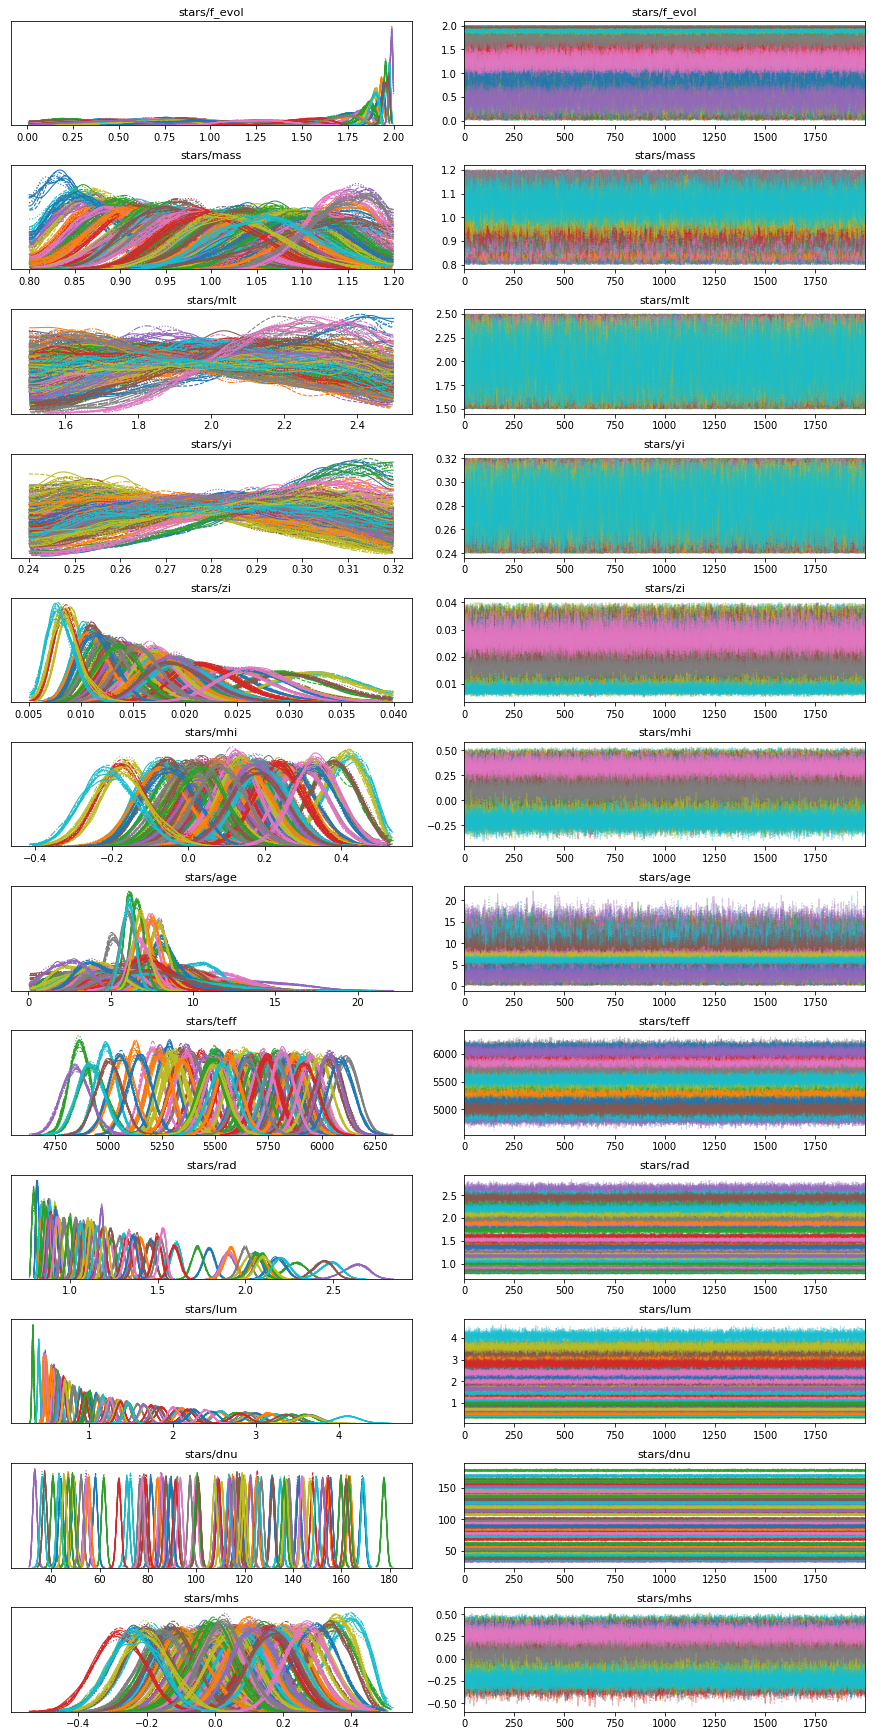

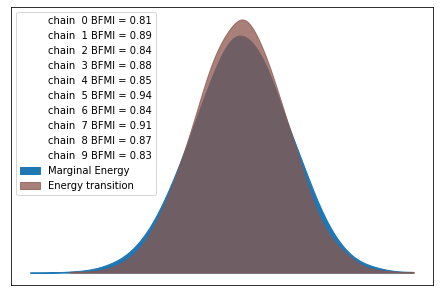

In [9]:
stars.plot_diagnostics(save=True);

In [11]:
# stars.plot_corners(save=True)